In [1]:
#1. The operations team wants to ensure the integrity of the events data by removing duplicates. Check for and remove duplicate rows in the events dataframe based on store_id, campaign_id, and product_code. How many duplicate rows were removed?

In [2]:
from operator import index

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from streamlit import columns
from sympy.printing.pretty.pretty_symbology import line_width

df_dim_campaigns = pd.read_csv("datasets/dim_campaigns.csv")
df_dim_products = pd.read_csv("datasets/dim_products.csv")
df_dim_stores = pd.read_csv("datasets/dim_stores.csv")
df_fact_events = pd.read_csv("datasets/fact_events.csv")


In [3]:
print(df_dim_campaigns.shape)
print(df_dim_products.shape)
print(df_dim_stores.shape)
print(df_fact_events.shape)

(2, 4)
(15, 3)
(50, 2)
(1510, 9)


### 1. The operations team wants to ensure the integrity of the events data by removing duplicates. Check for and remove duplicate rows in the events dataframe based on store_id, campaign_id, and product_code. How many duplicate rows were removed?


In [4]:
print(df_fact_events.shape)
df_fact_events.head()

(1510, 9)


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [5]:
df_fact_events.duplicated().sum()

10

In [6]:
df_fact_events[df_fact_events.duplicated(keep='first')]

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
74,46d57b,STBLR-9,CAMP_DIW_01,P13,350,94.0,BOGOF,175,329
410,f6aa36,STVSK-3,CAMP_DIW_01,P06,415,63.0,25% OFF,311,54
541,6.24E+11,STMLR-0,CAMP_SAN_01,P03,200,206.0,BOGOF,100,541
759,0f8686,STVSK-0,CAMP_SAN_01,P07,300,24.0,BOGOF,150,92
922,491ff2,STVJD-1,CAMP_SAN_01,P12,62,30.0,50% OFF,31,42
1003,4ad12b,STBLR-4,CAMP_DIW_01,P15,3000,407.0,500 Cashback,2500,1245
1155,cd4c5a,STMLR-0,CAMP_SAN_01,P09,90,34.0,25% OFF,67,28
1227,0491f4,STVSK-2,CAMP_DIW_01,P11,190,38.0,50% OFF,95,58
1313,5c7b20,STCBE-4,CAMP_DIW_01,P05,55,101.0,25% OFF,41,89
1401,d622c3,STHYD-0,CAMP_SAN_01,P10,50,25.0,25% OFF,37,20


In [7]:
df_fact_events.drop_duplicates(keep='first', inplace=True)
df_fact_events.duplicated().sum()

0

#### ---> Answer q1 :  Total 10 duplicated was removed

### 2. How many cities have more than 5 stores?

In [8]:
df_dim_stores.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


* Merge dim_stores with dim_fact_events

In [9]:
df_events_store = pd.merge(df_dim_stores, df_fact_events, on='store_id', how='inner')
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187


In [10]:
df_events_store['store_id'].unique()

array(['STTRV-0', 'STMDU-3', 'STHYD-6', 'STVSK-1', 'STCBE-3', 'STBLR-8',
       'STBLR-2', 'STCHE-7', 'STCBE-0', 'STVSK-0', 'STCHE-5', 'STHYD-5',
       'STMDU-1', 'STVJD-0', 'STMDU-2', 'STMYS-3', 'STMLR-0', 'STVSK-4',
       'STCHE-3', 'STCHE-6', 'STBLR-6', 'STCBE-2', 'STMLR-1', 'STCHE-2',
       'STCHE-1', 'STBLR-5', 'STMYS-0', 'STMDU-0', 'STBLR-9', 'STVSK-2',
       'STTRV-1', 'STBLR-3', 'STHYD-0', 'STBLR-4', 'STHYD-2', 'STBLR-7',
       'STVSK-3', 'STCBE-1', 'STHYD-1', 'STMYS-2', 'STMLR-2', 'STBLR-0',
       'STHYD-4', 'STCHE-0', 'STBLR-1', 'STVJD-1', 'STHYD-3', 'STCHE-4',
       'STCBE-4', 'STMYS-1'], dtype=object)

In [11]:
holder_city =df_events_store.groupby('city')['store_id'].unique()
holder_city

city
Bengaluru        [STBLR-8, STBLR-2, STBLR-6, STBLR-5, STBLR-9, ...
Chennai          [STCHE-7, STCHE-5, STCHE-3, STCHE-6, STCHE-2, ...
Coimbatore           [STCBE-3, STCBE-0, STCBE-2, STCBE-1, STCBE-4]
Hyderabad        [STHYD-6, STHYD-5, STHYD-0, STHYD-2, STHYD-1, ...
Madurai                       [STMDU-3, STMDU-1, STMDU-2, STMDU-0]
Mangalore                              [STMLR-0, STMLR-1, STMLR-2]
Mysuru                        [STMYS-3, STMYS-0, STMYS-2, STMYS-1]
Trivandrum                                      [STTRV-0, STTRV-1]
Vijayawada                                      [STVJD-0, STVJD-1]
Visakhapatnam        [STVSK-1, STVSK-0, STVSK-4, STVSK-2, STVSK-3]
Name: store_id, dtype: object

In [12]:
holder = []
for key, item in holder_city.items():
    if len(item) > 5:
        print(f" city {key} --> {len(item)} stores")

 city Bengaluru --> 10 stores
 city Chennai --> 8 stores
 city Hyderabad --> 7 stores


#### ---> Answer q2 : There are 5 cities have more than 5 stores

### 3/ The sales team has identified missing values in the quantity_sold(before_promo) data. Estimate these values using the median quantity sold before the promotion. How many missing values were filled, and what is the median used for imputation?

In [13]:
df_fact_events.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [14]:
df_fact_events.isnull().sum()

event_id                        0
store_id                        0
campaign_id                     0
product_code                    0
base_price(before_promo)        0
quantity_sold(before_promo)    20
promo_type                      0
base_price(after_promo)         0
quantity_sold(after_promo)      0
dtype: int64

In [15]:
df_fact_events[df_fact_events['quantity_sold(before_promo)'].isnull()]

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
63,70c312,STHYD-4,CAMP_SAN_01,P13,350,NaN,BOGOF,175,534
119,d31787,STMYS-2,CAMP_SAN_01,P10,50,NaN,25% OFF,37,20
141,141d98,STCHE-4,CAMP_SAN_01,P03,200,NaN,BOGOF,100,1695
163,873333,STMLR-0,CAMP_DIW_01,P15,3000,NaN,500 Cashback,2500,509
341,2ef46d,STMDU-0,CAMP_DIW_01,P02,860,NaN,33% OFF,576,430
391,5372de,STCBE-3,CAMP_SAN_01,P10,50,NaN,25% OFF,37,22
558,77435f,STBLR-3,CAMP_SAN_01,P01,172,NaN,33% OFF,115,387
714,a1ef43,STTRV-1,CAMP_SAN_01,P12,62,NaN,50% OFF,31,38
745,95f061,STMYS-3,CAMP_SAN_01,P15,3000,NaN,500 Cashback,2500,443
758,5f313a,STCHE-2,CAMP_DIW_01,P10,65,NaN,50% OFF,32,135


In [16]:
df_fact_events['quantity_sold(before_promo)'].median()

78.0

In [17]:
df_fact_events['quantity_sold(before_promo)'] = df_fact_events['quantity_sold(before_promo)'].fillna(78)
df_fact_events.isnull().sum()

event_id                       0
store_id                       0
campaign_id                    0
product_code                   0
base_price(before_promo)       0
quantity_sold(before_promo)    0
promo_type                     0
base_price(after_promo)        0
quantity_sold(after_promo)     0
dtype: int64

#### Answer q3 : Has filled 20 null values by the median of quantity = 78

### 4/ Identify the product category with the lowest base price before the promotion.

In [18]:
df_dim_products.head()

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [19]:
df_fact_events.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [20]:
# Merge fact events and products datasets
df_events_product = pd.merge(df_fact_events, df_dim_products, on='product_code', how='inner')
df_events_product.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1


In [21]:
 df_category_lowest_price= df_events_product[['base_price(before_promo)','product_code','category']]
 df_category_lowest_price

,base_price(before_promo),product_code,category
0,290,P04,Grocery & Staples
1,370,P04,Grocery & Staples
2,860,P02,Grocery & Staples
3,55,P05,Home Care
4,3000,P15,Combo1
...,...,...,...
1495,172,P01,Grocery & Staples
1496,172,P01,Grocery & Staples
1497,172,P01,Grocery & Staples
1498,55,P05,Home Care


In [22]:
df_category_lowest_price[df_category_lowest_price['base_price(before_promo)']==50].groupby('product_code')['category'].unique()

product_code
P10    [Personal Care]
Name: category, dtype: object

#### Answer 4 --> The category product : Personal Care has the lowest price = 50 base price before promote

### 5/ What is the total quantity sold after the promotion for the BOGOF promo type during the Diwali campaign?

In [23]:
df_dim_campaigns

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [24]:
df_events_product.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1


In [25]:
# Way 1 
# Merge campaign and events product dataset
df_events_campaigns = pd.merge(df_events_product, df_dim_campaigns, on='campaign_id', how='inner')
df_events_campaigns.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024


In [26]:
get_quantity_BOGOF = df_events_campaigns[['promo_type','campaign_id','campaign_name','quantity_sold(after_promo)']]
get_quantity_BOGOF.head()

,promo_type,campaign_id,campaign_name,quantity_sold(after_promo)
0,25% OFF,CAMP_DIW_01,Diwali,287
1,BOGOF,CAMP_SAN_01,Sankranti,1622
2,33% OFF,CAMP_DIW_01,Diwali,488
3,25% OFF,CAMP_DIW_01,Diwali,107
4,500 Cashback,CAMP_SAN_01,Sankranti,272


In [27]:
get_quantity_BOGOF['promo_type'].unique()

array(['25% OFF', 'BOGOF', '33% OFF', '500 Cashback', '50% OFF'],
      dtype=object)

In [28]:
df_bogof = get_quantity_BOGOF[(get_quantity_BOGOF['promo_type']=='BOGOF') & (get_quantity_BOGOF['campaign_name']=='Diwali')]
df_bogof

,promo_type,campaign_id,campaign_name,quantity_sold(after_promo)
6,BOGOF,CAMP_DIW_01,Diwali,127
8,BOGOF,CAMP_DIW_01,Diwali,227
9,BOGOF,CAMP_DIW_01,Diwali,101
13,BOGOF,CAMP_DIW_01,Diwali,226
27,BOGOF,CAMP_DIW_01,Diwali,204
...,...,...,...,...
1469,BOGOF,CAMP_DIW_01,Diwali,213
1481,BOGOF,CAMP_DIW_01,Diwali,125
1483,BOGOF,CAMP_DIW_01,Diwali,73
1486,BOGOF,CAMP_DIW_01,Diwali,166


In [29]:
df_bogof['quantity_sold(after_promo)'].sum()

34461

#### Answer 5 : There are 34461 products have sold after promote with campaign name : Diwali and promo type is BOGOF

In [30]:
# way 2 : searching BOGOF 
df_events_campaigns.head(2)

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024


In [31]:
df_events_campaigns[df_events_campaigns['promo_type'].str.contains('BOGOF')]

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
6,6bbadf,STHYD-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,127,Atliq_waterproof_Immersion_Rod,Home Appliances,Diwali,12-11-2023,18-11-2023
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Atliq_Double_Bedsheet_set,Home Care,Sankranti,10-01-2024,16-01-2024
8,66c422,STBLR-5,CAMP_DIW_01,P07,300,66.0,BOGOF,150,227,Atliq_Curtains,Home Care,Diwali,12-11-2023,18-11-2023
9,108d5a,STCBE-0,CAMP_DIW_01,P14,1020,29.0,BOGOF,510,101,Atliq_waterproof_Immersion_Rod,Home Appliances,Diwali,12-11-2023,18-11-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,8cee6d,STCBE-3,CAMP_DIW_01,P14,1020,22.0,BOGOF,510,73,Atliq_waterproof_Immersion_Rod,Home Appliances,Diwali,12-11-2023,18-11-2023
1484,317699,STCHE-2,CAMP_SAN_01,P03,200,310.0,BOGOF,100,1246,Atliq_Suflower_Oil (1L),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
1486,f41ca1,STCBE-2,CAMP_DIW_01,P07,300,42.0,BOGOF,150,166,Atliq_Curtains,Home Care,Diwali,12-11-2023,18-11-2023
1489,e17280,STVSK-2,CAMP_DIW_01,P08,1190,38.0,BOGOF,595,129,Atliq_Double_Bedsheet_set,Home Care,Diwali,12-11-2023,18-11-2023


### 6 / Which store recorded the highest quantity sold after the promotion during the Diwali campaign?

In [32]:
df_events_campaigns.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024


In [33]:
max_quantity_after_promo = df_events_campaigns['quantity_sold(after_promo)'].max()
max_quantity_after_promo

2067

In [34]:
max_dewali_aft=df_events_campaigns[(df_events_campaigns['campaign_name']=='Diwali')]['quantity_sold(after_promo)'].max()
max_dewali_aft

1545

In [35]:
df_events_campaigns[(df_events_campaigns['campaign_name']=='Diwali') & (df_events_campaigns['quantity_sold(after_promo)'] == max_dewali_aft)]

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
619,59f792,STCHE-4,CAMP_DIW_01,P15,3000,448.0,500 Cashback,2500,1545,Atliq_Home_Essential_8_Product_Combo,Combo1,Diwali,12-11-2023,18-11-2023


#### Answer 6 --> The store STCHE-4 has the highest quantity sale after promote

### 7/ Understand which campaigns had the most successful outcomes.Compare the total quantities sold before and after the promotions for the Sankranti and Diwali campaigns. Which campaign saw a greater increase in sales?

In [36]:
df_events_campaigns.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024


In [37]:
df_diwa_sankra=df_events_campaigns[df_events_campaigns['campaign_name'].isin(['Diwali', 'Sankranti'])]
df_diwa_sankra


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Atliq_Masoor_Dal (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Atliq_Masoor_Dal (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Atliq_Masoor_Dal (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023


In [38]:
#Compare quantity before promote
total_sold_bf_diwa_sankra=df_diwa_sankra.groupby('campaign_name')['quantity_sold(before_promo)'].sum().reset_index()
total_sold_bf_diwa_sankra


,campaign_name,quantity_sold(before_promo)
0,Diwali,109756.0
1,Sankranti,97894.0


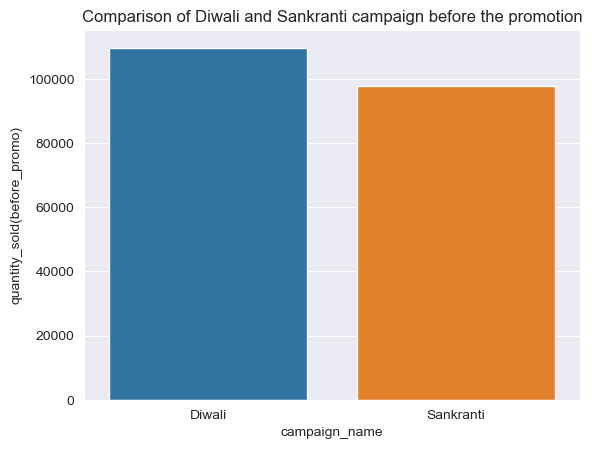

In [39]:
sns.barplot(total_sold_bf_diwa_sankra, x = 'campaign_name', y = 'quantity_sold(before_promo)', hue='campaign_name')
plt.title("Comparison of Diwali and Sankranti campaign before the promotion")
plt.show()

In [40]:
# Compare after promote 
total_sold_aft_diwa_sankra=df_diwa_sankra.groupby('campaign_name')['quantity_sold(after_promo)'].sum().reset_index()
total_sold_aft_diwa_sankra

,campaign_name,quantity_sold(after_promo)
0,Diwali,183404
1,Sankranti,252069


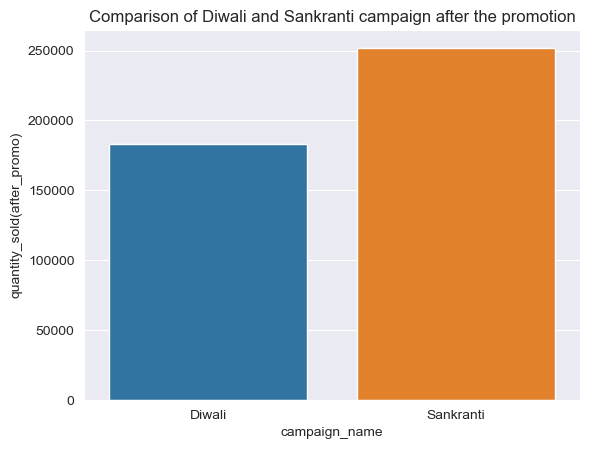

In [41]:
sns.barplot(total_sold_aft_diwa_sankra, x = 'campaign_name', y = 'quantity_sold(after_promo)', hue='campaign_name')
plt.title("Comparison of Diwali and Sankranti campaign after the promotion")
plt.show()

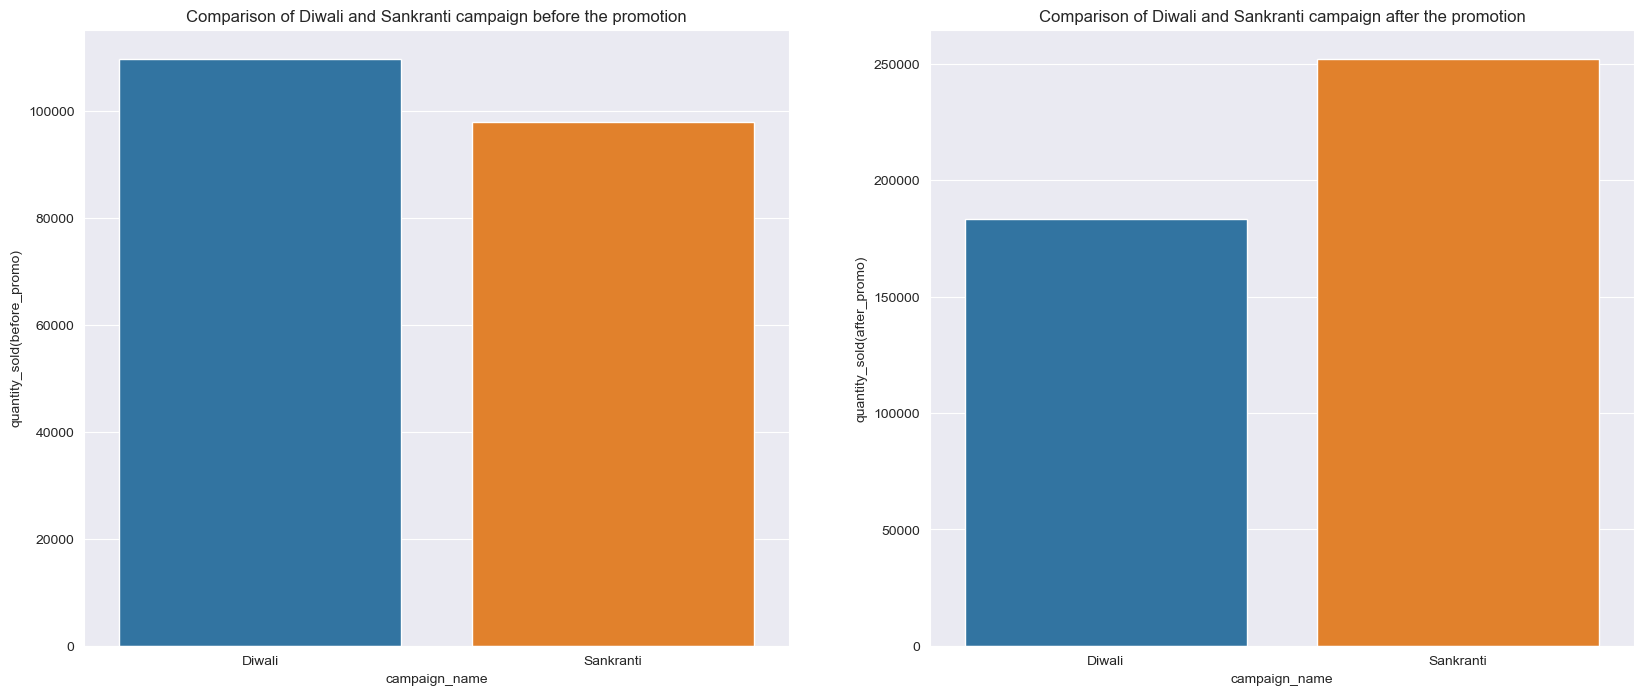

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()
sns.barplot(total_sold_bf_diwa_sankra, x = 'campaign_name', y = 'quantity_sold(before_promo)', hue='campaign_name', ax=axes[0])
axes[0].set_title('Comparison of Diwali and Sankranti campaign before the promotion')

sns.barplot(total_sold_aft_diwa_sankra, x = 'campaign_name', y = 'quantity_sold(after_promo)', hue='campaign_name', ax=axes[1])
axes[1].set_title("Comparison of Diwali and Sankranti campaign after the promotion")
plt.show()


### 8/ Which product recorded the highest Incremental Revenue Percentage(IR%) during the Sankranti campaign? What is the IR% for this product?


In [43]:
df_events_campaigns.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024


In [44]:
# Filter campaign name 'Sankranti'
df_sankrati_campaign=df_events_campaigns[df_events_campaigns['campaign_name'] =='Sankranti']
df_sankrati_campaign.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Atliq_Double_Bedsheet_set,Home Care,Sankranti,10-01-2024,16-01-2024
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Atliq_Suflower_Oil (1L),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care,Sankranti,10-01-2024,16-01-2024


In [45]:
# Calculate revenue before after promotion
df_sankrati_campaign.loc[:,'revenue(before_promo)'] = df_sankrati_campaign['base_price(before_promo)'] * df_sankrati_campaign['quantity_sold(before_promo)']
df_sankrati_campaign.loc[:, 'revenue(after_promo)'] = df_sankrati_campaign['base_price(after_promo)'] * df_sankrati_campaign['quantity_sold(after_promo)']
df_sankrati_campaign.head()

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_1648/2775330783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sankrati_campaign.loc[:,'revenue(before_promo)'] = df_sankrati_campaign['base_price(before_promo)'] * df_sankrati_campaign['quantity_sold(before_promo)']
/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_1648/2775330783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sankrati_campaign.loc[:, 'revenue(after_promo)'] = df_sankrati_campaign['base_price(after_promo)']

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,revenue(before_promo),revenue(after_promo)
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024,140230.0,300070
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024,366000.0,680000
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Atliq_Double_Bedsheet_set,Home Care,Sankranti,10-01-2024,16-01-2024,26180.0,52360
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Atliq_Suflower_Oil (1L),Grocery & Staples,Sankranti,10-01-2024,16-01-2024,72200.0,96300
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care,Sankranti,10-01-2024,16-01-2024,4410.0,3082


In [46]:
df_IR_sankranti=df_sankrati_campaign.groupby('product_name')[['revenue(before_promo)','revenue(after_promo)']].sum()


In [47]:
df_IR_sankranti['IR%'] = (df_IR_sankranti['revenue(after_promo)'] - df_IR_sankranti['revenue(before_promo)'])*100/df_IR_sankranti['revenue(before_promo)']
df_IR_sankranti.sort_values(by='IR%',ascending=False).round(2)

,revenue(before_promo),revenue(after_promo),IR%
product_name,,,
Atliq_Suflower_Oil (1L),3189600.0,6118500,91.83
Atliq_Home_Essential_8_Product_Combo,16185000.0,31027500,91.71
Atliq_High_Glo_15W_LED_Bulb,1740550.0,3303125,89.77
Atliq_waterproof_Immersion_Rod,4542060.0,8534850,87.91
Atliq_Farm_Chakki_Atta (1KG),6813550.0,12779800,87.56
Atliq_Double_Bedsheet_set,2485910.0,4649330,87.03
Atliq_Curtains,583500.0,1065450,82.60
Atliq_Masoor_Dal (1KG),2108376.0,2011235,-4.61
Atliq_Sonamasuri_Rice (10KG),18374760.0,17262720,-6.05


#### Answer 8 -- > Product name 'Atliq_Suflower_Oil (1L)' has the highest IR % for campaign 'Sankranti'. And the percentage of IR from this product is 91.83%

### 9/ Which store in Visakhapatnam recorded the lowest Incremental Sold Units Percentage (ISU%) during the Diwali campaign? What is the ISU% for that store?

In [48]:
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187


In [49]:
#Filter campaign name is Diwali
df_Diwali_campaign=df_events_campaigns[df_events_campaigns['campaign_name'] =='Diwali']
df_Diwali_campaign.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
5,87564a,STCHE-6,CAMP_DIW_01,P04,290,346.0,25% OFF,217,269,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
6,6bbadf,STHYD-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,127,Atliq_waterproof_Immersion_Rod,Home Appliances,Diwali,12-11-2023,18-11-2023


In [50]:
#Get city
df_Diwali_campaign = pd.merge(df_Diwali_campaign, df_dim_stores, how='inner',on='store_id' )
df_Diwali_campaign.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023,Chennai
1,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023,Bengaluru
2,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023,Bengaluru
3,87564a,STCHE-6,CAMP_DIW_01,P04,290,346.0,25% OFF,217,269,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023,Chennai
4,6bbadf,STHYD-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,127,Atliq_waterproof_Immersion_Rod,Home Appliances,Diwali,12-11-2023,18-11-2023,Hyderabad


In [51]:
#Groupby store id 
df_ISU_Visakhapatnam=df_Diwali_campaign[df_Diwali_campaign['city']=='Visakhapatnam'].groupby('store_id')[['quantity_sold(before_promo)','quantity_sold(after_promo)']].sum()
df_ISU_Visakhapatnam

,quantity_sold(before_promo),quantity_sold(after_promo)
store_id,,
STVSK-0,1768.0,3005
STVSK-1,1903.0,3078
STVSK-2,1701.0,2860
STVSK-3,1780.0,2656
STVSK-4,1926.0,2908


In [52]:
df_ISU_Visakhapatnam['ISU%'] = ( df_ISU_Visakhapatnam['quantity_sold(after_promo)'] - df_ISU_Visakhapatnam['quantity_sold(before_promo)'] ) *100/df_ISU_Visakhapatnam['quantity_sold(before_promo)']
df_ISU_Visakhapatnam.sort_values(by='ISU%',ascending=True).round(2)

,quantity_sold(before_promo),quantity_sold(after_promo),ISU%
store_id,,,
STVSK-3,1780.0,2656,49.21
STVSK-4,1926.0,2908,50.99
STVSK-1,1903.0,3078,61.74
STVSK-2,1701.0,2860,68.14
STVSK-0,1768.0,3005,69.97


#### Answer 9 -- > The store id : 'STVSK-3 has the lowest ISU % for campaign 'Diwali' in Visakhapatnam city. And the percentage of ISU % from this product is 49.21 %

### 10 / Which promo type had both a negative Incremental Revenue Percentage (IR%) and Incremental Sold Units Percentage (ISU%) during the Sankranti campaign?

In [53]:
df_sankrati_campaign.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,revenue(before_promo),revenue(after_promo)
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024,140230.0,300070
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024,366000.0,680000
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Atliq_Double_Bedsheet_set,Home Care,Sankranti,10-01-2024,16-01-2024,26180.0,52360
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Atliq_Suflower_Oil (1L),Grocery & Staples,Sankranti,10-01-2024,16-01-2024,72200.0,96300
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care,Sankranti,10-01-2024,16-01-2024,4410.0,3082


In [54]:
#Group by promo_type
df_get_promo_type=df_sankrati_campaign.groupby('promo_type')[['quantity_sold(before_promo)','quantity_sold(after_promo)','revenue(before_promo)','revenue(after_promo)']].sum()
df_get_promo_type

,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo)
promo_type,,,,
25% OFF,6601.0,5307,935195.0,567387
33% OFF,33624.0,47459,20483136.0,19273955
50% OFF,4451.0,6100,527482.0,363564
500 Cashback,5395.0,12411,16185000.0,31027500
BOGOF,47823.0,180792,19355170.0,36451055


In [55]:
# Calculate IR% and ISU%
df_get_promo_type['IR%'] = (df_get_promo_type['revenue(after_promo)'] - df_get_promo_type['revenue(before_promo)'])*100/df_get_promo_type['revenue(before_promo)']
df_get_promo_type['ISU%'] = (df_get_promo_type['quantity_sold(after_promo)'] -df_get_promo_type['quantity_sold(before_promo)']  ) *100 / df_get_promo_type['quantity_sold(before_promo)'] 
df_get_promo_type

,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo),IR%,ISU%
promo_type,,,,,,
25% OFF,6601.0,5307,935195.0,567387,-39.329552,-19.603090
33% OFF,33624.0,47459,20483136.0,19273955,-5.903300,41.146205
50% OFF,4451.0,6100,527482.0,363564,-31.075563,37.047854
500 Cashback,5395.0,12411,16185000.0,31027500,91.705283,130.046339
BOGOF,47823.0,180792,19355170.0,36451055,88.327227,278.044037


In [56]:
df_get_promo_type[(df_get_promo_type['IR%'] < 0 ) & (df_get_promo_type['ISU%'] < 0 ) ].round(2)

,quantity_sold(before_promo),quantity_sold(after_promo),revenue(before_promo),revenue(after_promo),IR%,ISU%
promo_type,,,,,,
25% OFF,6601.0,5307,935195.0,567387,-39.33,-19.6


#### Answer q10 --> The promote type which made both the IR% and ISU% to be negative is 25% OFF and IR% = -39.33, ISU% = -19.6

In [57]:
# 25% OFF,-39.33,-19.6

<h2 align='center'> II/ Visualization <h2>

### 1. Visualize the number of stores in each city.Identify the city with the most stores and explain the distribution of stores across other cities. How does the number of stores in Bengaluru compare with those in Hyderabad and Chennai?
(Hint: Use a bar chart to visualize the number of stores by city)

In [59]:
holder_city

city
Bengaluru        [STBLR-8, STBLR-2, STBLR-6, STBLR-5, STBLR-9, ...
Chennai          [STCHE-7, STCHE-5, STCHE-3, STCHE-6, STCHE-2, ...
Coimbatore           [STCBE-3, STCBE-0, STCBE-2, STCBE-1, STCBE-4]
Hyderabad        [STHYD-6, STHYD-5, STHYD-0, STHYD-2, STHYD-1, ...
Madurai                       [STMDU-3, STMDU-1, STMDU-2, STMDU-0]
Mangalore                              [STMLR-0, STMLR-1, STMLR-2]
Mysuru                        [STMYS-3, STMYS-0, STMYS-2, STMYS-1]
Trivandrum                                      [STTRV-0, STTRV-1]
Vijayawada                                      [STVJD-0, STVJD-1]
Visakhapatnam        [STVSK-1, STVSK-0, STVSK-4, STVSK-2, STVSK-3]
Name: store_id, dtype: object

In [177]:
df_get_city = pd.DataFrame(holder_city)
df_get_city

,store_id
city,
Bengaluru,"[STBLR-8, STBLR-2, STBLR-6, STBLR-5, STBLR-9, ..."
Chennai,"[STCHE-7, STCHE-5, STCHE-3, STCHE-6, STCHE-2, ..."
Coimbatore,"[STCBE-3, STCBE-0, STCBE-2, STCBE-1, STCBE-4]"
Hyderabad,"[STHYD-6, STHYD-5, STHYD-0, STHYD-2, STHYD-1, ..."
Madurai,"[STMDU-3, STMDU-1, STMDU-2, STMDU-0]"
Mangalore,"[STMLR-0, STMLR-1, STMLR-2]"
Mysuru,"[STMYS-3, STMYS-0, STMYS-2, STMYS-1]"
Trivandrum,"[STTRV-0, STTRV-1]"
Vijayawada,"[STVJD-0, STVJD-1]"


In [127]:
holder = []
for key, value in holder_city.items():
    holder.append({
        'city': key,
        'count': len(value)
    })
holder
    # print(f"{key} -->{len(value)}")

[{'city': 'Bengaluru', 'count': 10},
 {'city': 'Chennai', 'count': 8},
 {'city': 'Coimbatore', 'count': 5},
 {'city': 'Hyderabad', 'count': 7},
 {'city': 'Madurai', 'count': 4},
 {'city': 'Mangalore', 'count': 3},
 {'city': 'Mysuru', 'count': 4},
 {'city': 'Trivandrum', 'count': 2},
 {'city': 'Vijayawada', 'count': 2},
 {'city': 'Visakhapatnam', 'count': 5}]

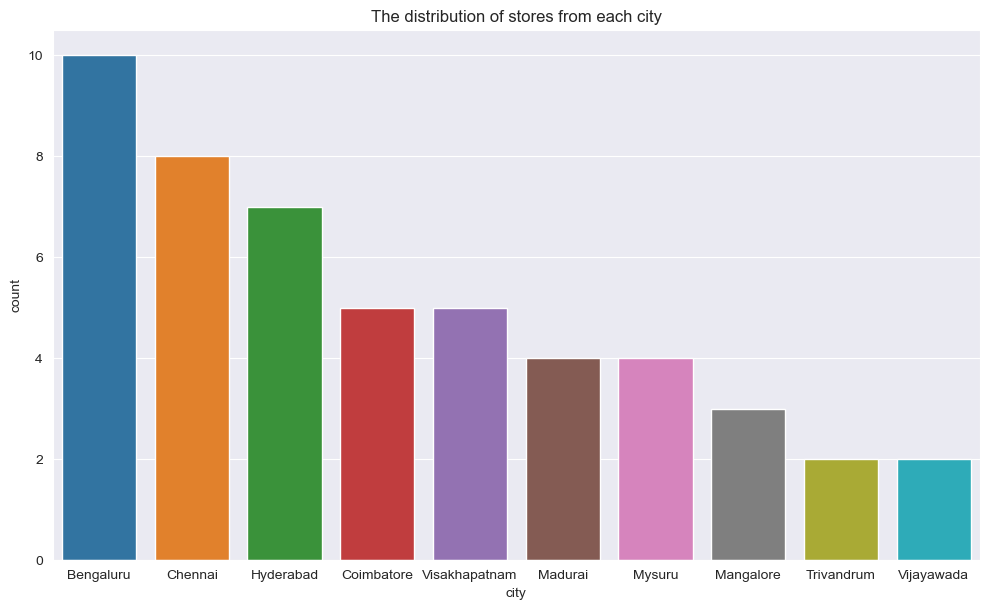

In [176]:
df_city = pd.DataFrame(holder).sort_values(by='count',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data = df_city, x = 'city', y='count', hue='city')
plt.tight_layout()
plt.title("The distribution of stores from each city")
plt.show()

In [180]:
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187


In [181]:
df_events_store['rev_bf_pro'] = df_events_store['base_price(before_promo)'] * df_events_store['quantity_sold(before_promo)']
df_events_store['rev_at_pro'] = df_events_store['base_price(after_promo)'] * df_events_store['quantity_sold(after_promo)']
df_events_store['total_rev'] = df_events_store['rev_bf_pro'] + df_events_store['rev_at_pro']
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,total_rev
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280,71400.0,142800,214200.0
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30,1364.0,930,2294.0
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117,9000.0,17550,26550.0
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16,900.0,592,1492.0
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187,22704.0,21505,44209.0


In [203]:
df_total_rev_stores=df_events_store.groupby('city')['total_rev'].sum()
df_total_rev_stores = pd.DataFrame(df_total_rev_stores).sort_values(by='total_rev',ascending=False).reset_index()


In [204]:
df_total_rev_stores

,city,total_rev
0,Bengaluru,92529718.0
1,Chennai,73430340.0
2,Hyderabad,60290558.0
3,Coimbatore,33778031.0
4,Mysuru,29443009.0
5,Visakhapatnam,29121320.0
6,Madurai,28604606.0
7,Mangalore,11560005.0
8,Vijayawada,10030314.0
9,Trivandrum,8751188.0


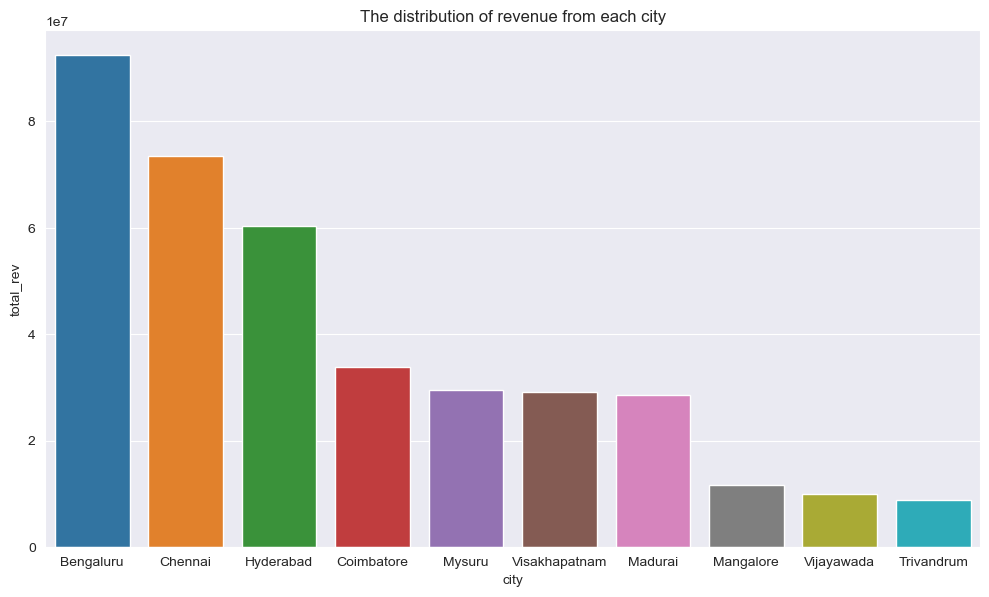

In [205]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_total_rev_stores, x = 'city', y = 'total_rev', hue = 'city')
plt.tight_layout()
plt.title("The distribution of revenue from each city")
plt.show()

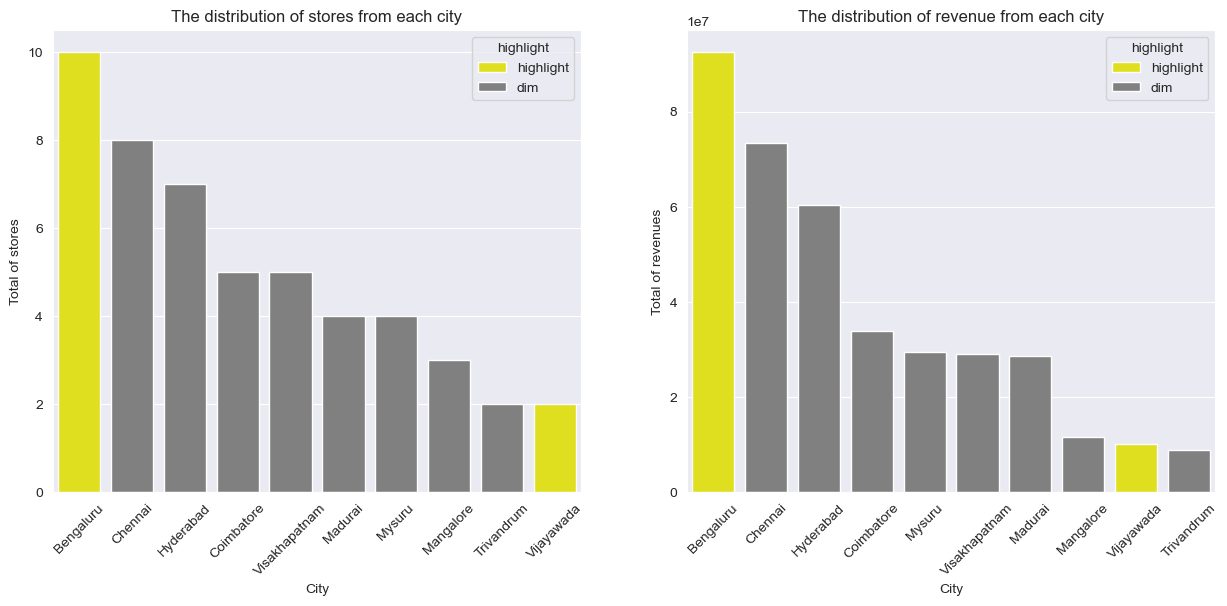

<Figure size 1000x600 with 0 Axes>

In [432]:
highlight_cities = ['Bengaluru', 'Vijayawada']

# Define colors
highlight_color = 'yellow'  # Use red for highlighted cities
dim_color = 'gray'       # Use gray for the rest

# Create a color palette for the first chart (store count)
colors_count = [highlight_color if city in highlight_cities else dim_color for city in df_city['city']]

# Create a color palette for the second chart (total revenue)
colors_revenue = [highlight_color if city in highlight_cities else dim_color for city in df_total_rev_stores['city']]

df_city['highlight'] = df_city['city'].apply(lambda city: 'highlight' if city in highlight_cities else 'dim')
df_total_rev_stores['highlight'] = df_total_rev_stores['city'].apply(lambda city: 'highlight' if city in highlight_cities else 'dim')

# Define color palette
color_palette = {'highlight': highlight_color, 'dim': dim_color}

fif, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes = axes.flatten()
# Chart compare quantity of stores from each city
plt.figure(figsize=(10,6))
sns.barplot(data = df_city, x = 'city', y='count', ax=axes[0], palette=color_palette,hue='highlight', dodge=False)
axes[0].set_title("The distribution of stores from each city")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel("City")
axes[0].set_ylabel("Total of stores")
#Chart compare revenue of each city
sns.barplot(data = df_total_rev_stores, x = 'city', y = 'total_rev', ax = axes[1], palette=color_palette,hue='highlight', dodge=False)
axes[1].set_title("The distribution of revenue from each city")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel("City")
axes[1].set_ylabel("Total of revenues")
plt.tight_layout()
plt.show()

### 2. Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories. What percentage does each category contribute to the overall sales, and what insights can be drawn from these contributions?
(Hint: Use a pie chart to visualize percentage contribution of each category to the overall sales)


In [213]:
df_sankrati_campaign.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,campaign_name,start_date,end_date,revenue(before_promo),revenue(after_promo)
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024,140230.0,300070
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024,366000.0,680000
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Atliq_Double_Bedsheet_set,Home Care,Sankranti,10-01-2024,16-01-2024,26180.0,52360
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Atliq_Suflower_Oil (1L),Grocery & Staples,Sankranti,10-01-2024,16-01-2024,72200.0,96300
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care,Sankranti,10-01-2024,16-01-2024,4410.0,3082


In [230]:
rev_category_at_prom=df_sankrati_campaign.groupby('category')[['quantity_sold(after_promo)','revenue(after_promo)']].sum()
rev_category_at_prom

,quantity_sold(after_promo),revenue(after_promo)
category,,
Combo1,12411,31027500
Grocery & Staples,177724,38172255
Home Appliances,35610,11837975
Home Care,16894,6093377
Personal Care,9430,552354


In [231]:
df_rev_at_prom = pd.DataFrame(rev_category_at_prom).reset_index()
df_rev_at_prom

,category,quantity_sold(after_promo),revenue(after_promo)
0,Combo1,12411,31027500
1,Grocery & Staples,177724,38172255
2,Home Appliances,35610,11837975
3,Home Care,16894,6093377
4,Personal Care,9430,552354


In [232]:
total_rev_at_promote_sankrati=df_rev_at_prom['revenue(after_promo)'].sum()
total_rev_at_promote_sankrati

87683461

In [242]:
df_rev_at_prom['pct_rev_contribution'] = df_rev_at_prom.apply(lambda row : (row['revenue(after_promo)']*100/total_rev_at_promote_sankrati).round(2),axis=1)
df_rev_at_prom.sort_values(by='quantity_sold(after_promo)',ascending=False, inplace=True)
df_rev_at_prom

,category,quantity_sold(after_promo),revenue(after_promo),pct_rev_contribution
1,Grocery & Staples,177724,38172255,43.53
2,Home Appliances,35610,11837975,13.50
3,Home Care,16894,6093377,6.95
0,Combo1,12411,31027500,35.39
4,Personal Care,9430,552354,0.63


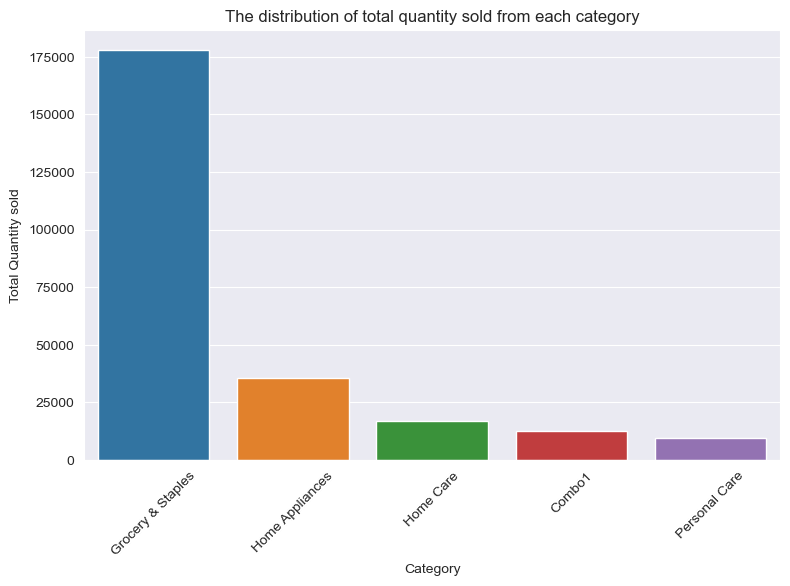

In [247]:
# Analyze total quantity sold  from each category
plt.figure(figsize=(8,5))
sns.barplot(df_rev_at_prom, x = 'category', y = 'quantity_sold(after_promo)', hue='category')
plt.tight_layout()
plt.title("The distribution of total quantity sold from each category") 
plt.xlabel("Category")
plt.ylabel("Total Quantity sold")
plt.xticks(rotation=45)
plt.show()

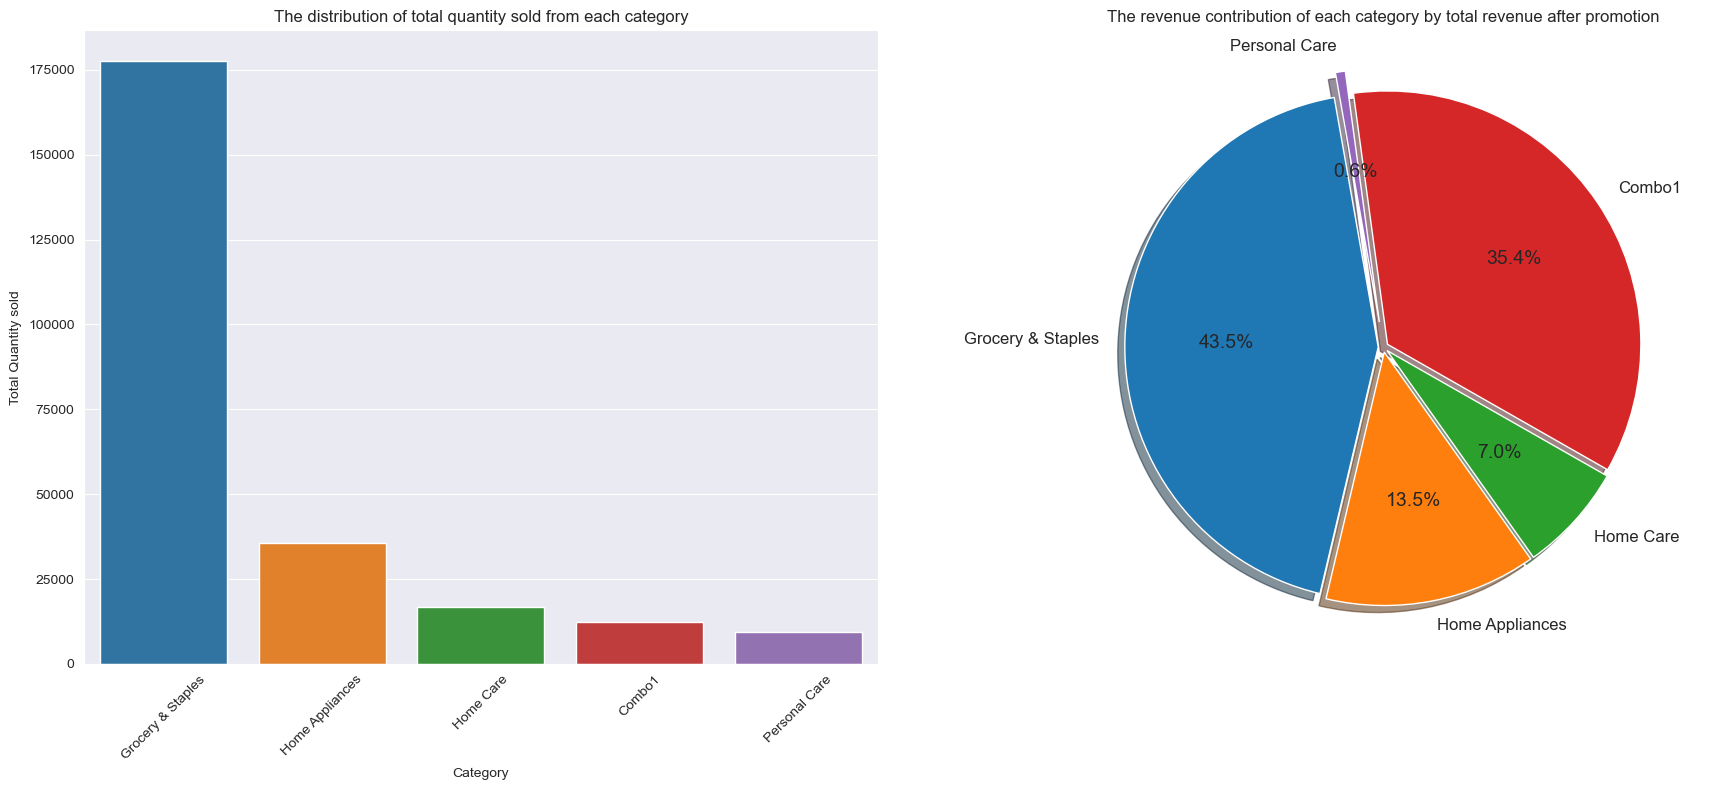

In [262]:
# Analyze the contribute of each category revenue with total revenue after promotion
# Bar chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
axes = axes.flatten()
sns.barplot(df_rev_at_prom, x = 'category', y = 'quantity_sold(after_promo)', hue='category', ax=axes[0])
axes[0].set_title("The distribution of total quantity sold from each category")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Total Quantity sold")
#Pie chart
wedges, texts, autotexts = axes[1].pie(
    df_rev_at_prom['pct_rev_contribution'], 
    labels=df_rev_at_prom['category'], 
    startangle=100, 
    autopct='%1.1f%%', 
    explode=(0.02, 0.02, 0.02, 0.02, 0.1), 
    shadow=True, 
)
# Increase the size of the autopct text
for autotext in autotexts:
    autotext.set_size(14)  # Set font size

# Customize label text size (category names)
for text in texts:
    text.set_size(12)  # Set font size
axes[1].set_title("The revenue contribution of each category by total revenue after promotion")
plt.tight_layout()
plt.show()

### 3. Examine the correlation between base price (after the promotion) and sales quantities (after the promotion). What insights can be drawn regarding the relationship between base price and sales quantities after the promotion? 
(Hint: Use heatmap to get the correlation)


In [263]:
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,total_rev
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280,71400.0,142800,214200.0
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30,1364.0,930,2294.0
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117,9000.0,17550,26550.0
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16,900.0,592,1492.0
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187,22704.0,21505,44209.0


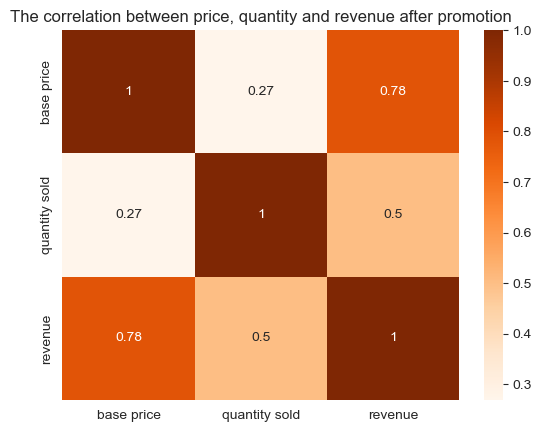

In [434]:
# Analyze the correlation between base price and total quantities sold after promote
list_correl = ['base_price(after_promo)','quantity_sold(after_promo)','rev_at_pro']
corr_base_price_quantity_after_pro = df_events_store[list_correl].corr()

sns.heatmap(corr_base_price_quantity_after_pro, annot=True, cmap='Oranges', fmt='.2g', cbar=True, xticklabels=['base price','quantity sold', 'revenue'], yticklabels=['base price','quantity sold','revenue'])
plt.title("The correlation between price, quantity and revenue after promotion")
plt.show()

### 4. Analyze the distribution of quantity sold before the promotion for each product category (Grocery & Staples, Home Care, Personal Care, Home Appliances, etc.). What patterns or trends do you observe across these categories, and how could these insights inform future promotional strategies?
(Hint: Use individual histograms to visualize the distribution)


In [276]:
df_events_product.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1


In [277]:
df_events_product['category'].unique()

array(['Grocery & Staples', 'Home Care', 'Combo1', 'Home Appliances',
       'Personal Care'], dtype=object)

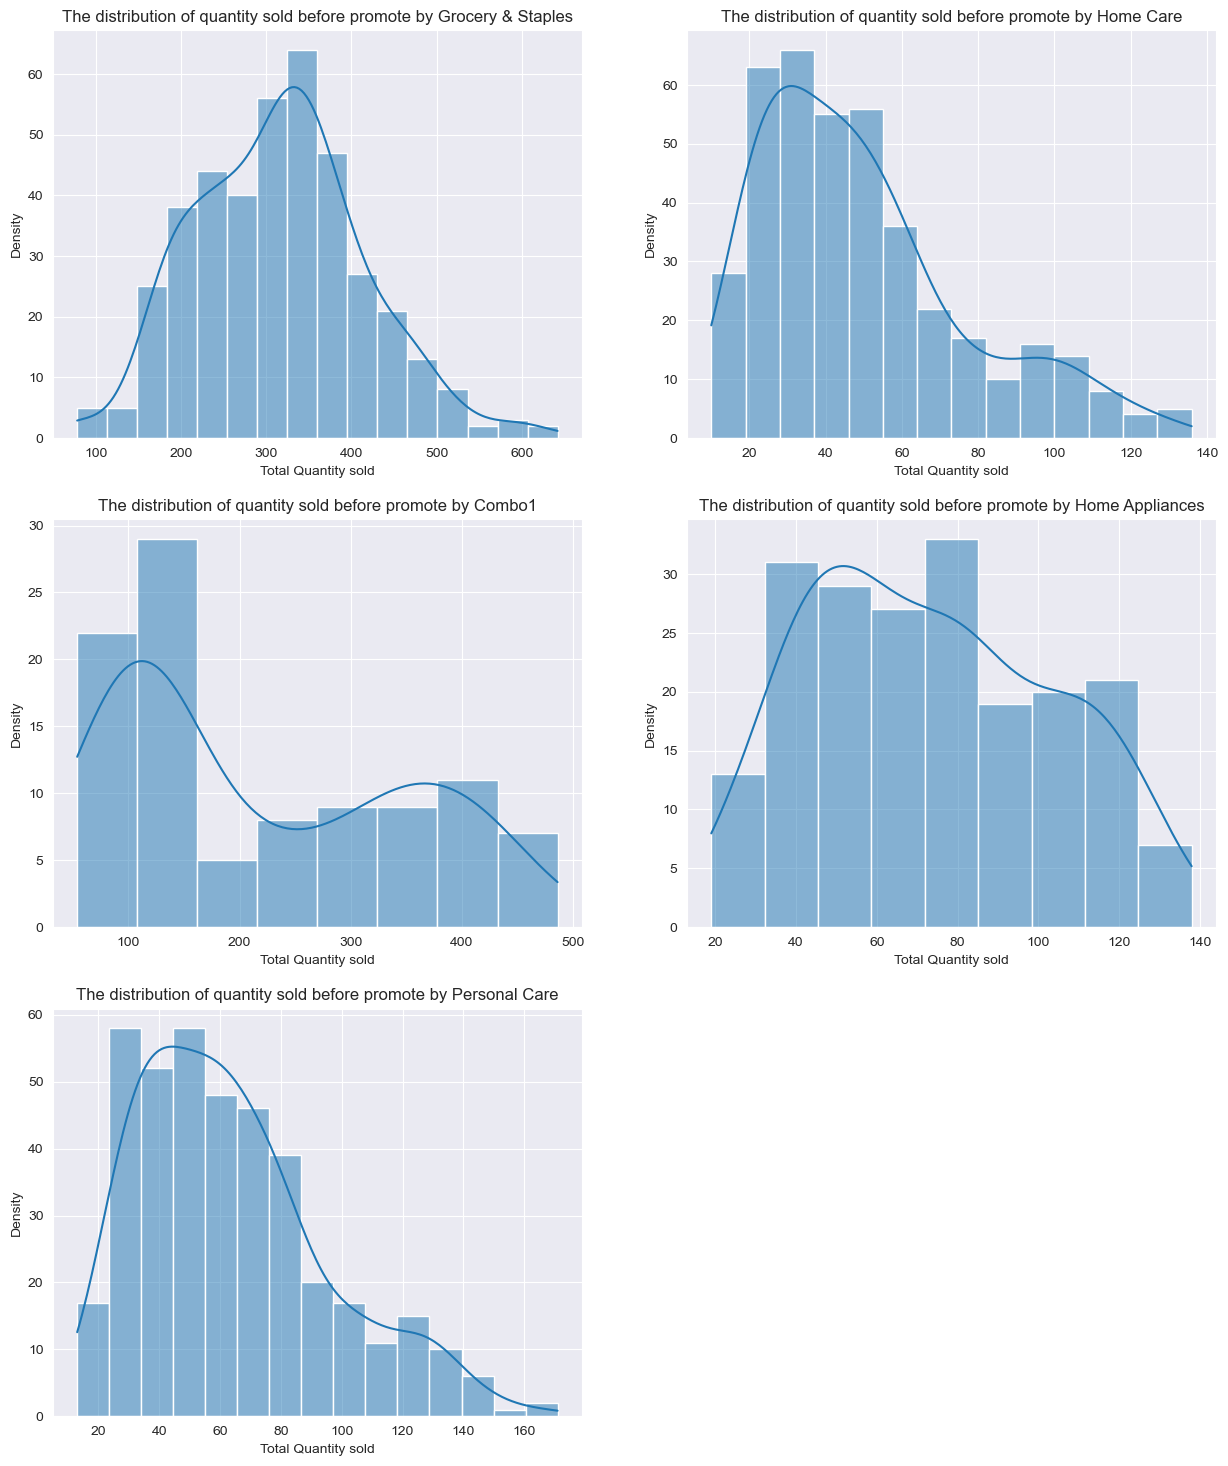

In [318]:
list_category = ['Grocery & Staples', 'Home Care', 'Combo1', 'Home Appliances','Personal Care']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,18))
axes = axes.flatten()
for idx, category in enumerate(list_category):
    sns.histplot(df_events_product[df_events_product['category']== category], x = 'quantity_sold(before_promo)', ax=axes[idx], kde=True, )
    axes[idx].set_title(f"The distribution of quantity sold before promote by {category}")
    axes[idx].set_xlabel("Total Quantity sold")
    axes[idx].set_ylabel("Density")
fig.delaxes(axes[-1])
plt.show()

In [309]:
df_events_product.groupby('category')['quantity_sold(before_promo)'].mean()


category
Combo1               217.300
Grocery & Staples    314.790
Home Appliances       73.280
Home Care             49.585
Personal Care         63.785
Name: quantity_sold(before_promo), dtype: float64

In [310]:
df_events_product.groupby('category')['quantity_sold(before_promo)'].max()


category
Combo1               486.0
Grocery & Staples    642.0
Home Appliances      138.0
Home Care            136.0
Personal Care        171.0
Name: quantity_sold(before_promo), dtype: float64

In [311]:
df_events_product.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1


In [312]:
df_events_product['rev_before_promo'] = df_events_product['quantity_sold(before_promo)']*df_events_product['base_price(before_promo)']
df_events_product.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,rev_before_promo
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,94830.0
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,140230.0
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,289820.0
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,6710.0
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,366000.0


In [ ]:
df_events_product

In [437]:
df_events_product.groupby('category')['rev_before_promo'].sum()

category
Combo1               65190000.0
Grocery & Staples    52519144.0
Home Appliances       9463160.0
Home Care             8904715.0
Personal Care         2492223.0
Name: rev_before_promo, dtype: float64

In [319]:
df_events_product.groupby('category')['quantity_sold(before_promo)'].sum()


category
Combo1                21730.0
Grocery & Staples    125916.0
Home Appliances       14656.0
Home Care             19834.0
Personal Care         25514.0
Name: quantity_sold(before_promo), dtype: float64

### 5. Analyze the incremental sold units percentage (ISU%) across various cities. Identify the city with the highest ISU% after the promotion and the city with the smallest change. What trends can be observed about the effectiveness of promotions in driving sales across these cities?
(Hint: Use a line chart to visualize the ISU% comparison across cities)

In [330]:
df_events_store.drop(['ISU','ISU%'], axis=1, inplace=True)

In [331]:
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,total_rev
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280,71400.0,142800,214200.0
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30,1364.0,930,2294.0
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117,9000.0,17550,26550.0
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16,900.0,592,1492.0
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187,22704.0,21505,44209.0


In [339]:
df_ISU_city=df_events_store.groupby('city')[['quantity_sold(before_promo)','quantity_sold(after_promo)','rev_bf_pro','rev_at_pro']].sum()
df_ISU_city.head()

,quantity_sold(before_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro
city,,,,
Bengaluru,48894.0,105141,32895635.0,59678588
Chennai,38949.0,83273,26187494.0,47445316
Coimbatore,18122.0,38900,12234554.0,21544291
Hyderabad,34179.0,69399,22573121.0,37909657
Madurai,13774.0,31169,9809712.0,19298281


In [340]:
df_ISU_city['ISU%'] =  ((df_ISU_city['quantity_sold(after_promo)'] - df_ISU_city['quantity_sold(before_promo)']) * 100/ df_ISU_city['quantity_sold(before_promo)']).round(2)
df_ISU_city['IR%'] =  ((df_ISU_city['rev_at_pro'] - df_ISU_city['rev_bf_pro']) * 100/ df_ISU_city['rev_bf_pro']).round(2)
df_ISU_city.sort_values(by='ISU%', ascending=False, inplace=True)
df_ISU_city

,quantity_sold(before_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,ISU%,IR%
city,,,,,,
Madurai,13774.0,31169,9809712.0,19298281,126.29,96.73
Bengaluru,48894.0,105141,32895635.0,59678588,115.04,81.42
Coimbatore,18122.0,38900,12234554.0,21544291,114.66,76.09
Chennai,38949.0,83273,26187494.0,47445316,113.80,81.18
Trivandrum,4806.0,10170,3200112.0,5552254,111.61,73.50
Vijayawada,5297.0,11106,3587937.0,6442377,109.67,79.56
Mysuru,17968.0,37470,11217037.0,23014212,108.54,105.17
Mangalore,7298.0,14929,4440166.0,8396614,104.56,89.11
Hyderabad,34179.0,69399,22573121.0,37909657,103.05,67.94


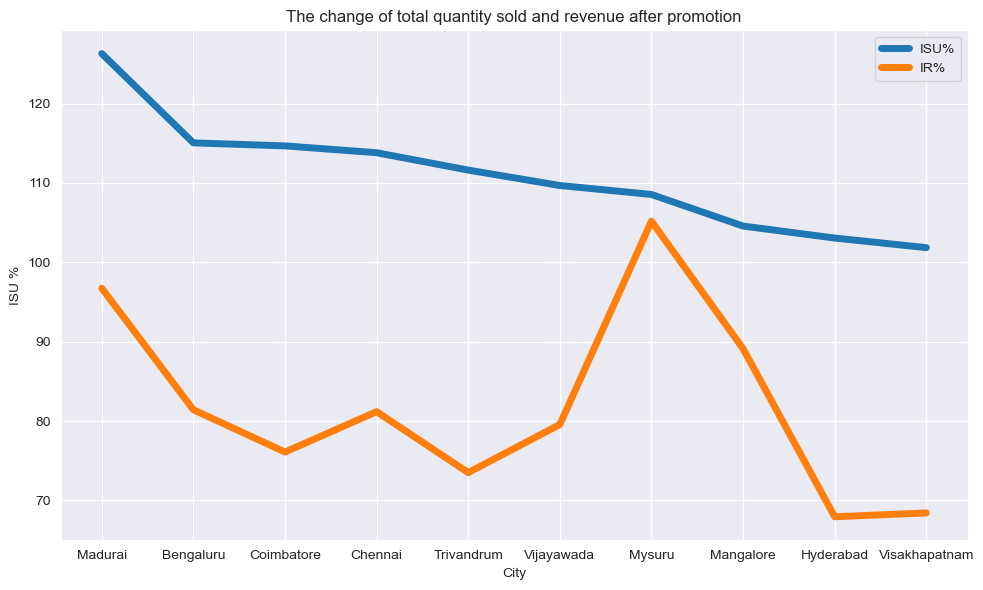

In [441]:
plt.figure(figsize=(10,6))
sns.lineplot(df_ISU_city, x = 'city', y='ISU%', label='ISU%', linewidth=5)
sns.lineplot(df_ISU_city, x = 'city', y='IR%', label='IR%',linewidth=5)
plt.title('The change of total quantity sold and revenue after promotion')
plt.xlabel("City")
plt.ylabel("ISU %")
plt.legend()
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad. Which promotion type led to the highest incremental sold units, and which one generated the highest incremental revenue? What insights can you draw from the balance between the two metrics for this city?
(Hint: Use a scatter plot to analyze the relationship)

In [362]:
df_events_store.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,total_rev
0,STTRV-0,Trivandrum,4236be,CAMP_SAN_01,P14,1020,70.0,BOGOF,510,280,71400.0,142800,214200.0
1,STTRV-0,Trivandrum,e97ac0,CAMP_SAN_01,P12,62,22.0,50% OFF,31,30,1364.0,930,2294.0
2,STTRV-0,Trivandrum,565a38,CAMP_SAN_01,P07,300,30.0,BOGOF,150,117,9000.0,17550,26550.0
3,STTRV-0,Trivandrum,ea916f,CAMP_SAN_01,P10,50,18.0,25% OFF,37,16,900.0,592,1492.0
4,STTRV-0,Trivandrum,30c488,CAMP_SAN_01,P01,172,132.0,33% OFF,115,187,22704.0,21505,44209.0


In [364]:
df_Hyderabad_city=df_events_store[df_events_store['city']=='Hyderabad']
df_Hyderabad_city.head()

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,total_rev
60,STHYD-6,Hyderabad,f32df2,CAMP_DIW_01,P04,290,390.0,25% OFF,217,339,113100.0,73563,186663.0
61,STHYD-6,Hyderabad,1824c2,CAMP_SAN_01,P12,62,67.0,50% OFF,31,93,4154.0,2883,7037.0
62,STHYD-6,Hyderabad,ffdcb8,CAMP_SAN_01,P02,860,454.0,33% OFF,576,644,390440.0,370944,761384.0
63,STHYD-6,Hyderabad,6d343d,CAMP_DIW_01,P12,62,133.0,50% OFF,31,167,8246.0,5177,13423.0
64,STHYD-6,Hyderabad,c25b15,CAMP_DIW_01,P07,300,63.0,BOGOF,150,218,18900.0,32700,51600.0


In [371]:
df_promotion=df_Hyderabad_city.groupby('promo_type')[['base_price(before_promo)','quantity_sold(before_promo)','base_price(after_promo)','quantity_sold(after_promo)']].sum()
df_promotion

,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
promo_type,,,,
25% OFF,10682,7288.0,7994,6348
33% OFF,14448,10404.0,9674,15104
50% OFF,4753,3592.0,2373,4883
500 Cashback,42000,3492.0,35000,9337
BOGOF,44030,9403.0,22015,33727


In [374]:
df_promotion['rev_after'] = (df_promotion['base_price(after_promo)'] * df_promotion['quantity_sold(after_promo)']).round(2)
df_promotion['rev_before'] = (df_promotion['base_price(before_promo)'] * df_promotion['quantity_sold(before_promo)']).round(2)
df_promotion['IR%'] = ((df_promotion['rev_after'] - df_promotion['rev_before']) *100 / df_promotion['rev_before'] ).round(2)
df_promotion['ISU%'] = (df_promotion['base_price(after_promo)'] - df_promotion['base_price(before_promo)'])*100/df_promotion['base_price(before_promo)']
df_promotion

,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo),rev_after,rev_before,IR%,ISU%
promo_type,,,,,,,,
25% OFF,10682,7288.0,7994,6348,50745912,77850416.0,-34.82,-25.163827
33% OFF,14448,10404.0,9674,15104,146116096,150316992.0,-2.79,-33.042636
50% OFF,4753,3592.0,2373,4883,11587359,17072776.0,-32.13,-50.073638
500 Cashback,42000,3492.0,35000,9337,326795000,146664000.0,122.82,-16.666667
BOGOF,44030,9403.0,22015,33727,742499905,414014090.0,79.34,-50.000000


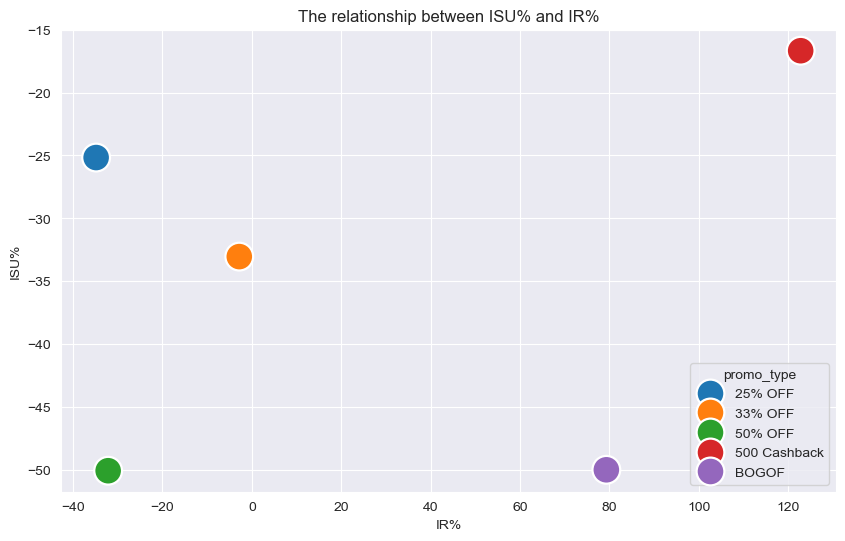

In [435]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_promotion, x = 'IR%', y='ISU%', hue='promo_type', palette="tab10", s=400)
plt.title('The relationship between ISU% and IR%')
plt.show()

### 7. Analyze the revenue before and after promotions across different product categories in Bengaluru. What trends can be identified in the performance of each category, and how did promotions impact overall revenue in the city? ]
(Hint: Use a vertical bar chart to compare the revenue before and after promotions)

In [391]:
df_events_store.sample(25)

,store_id,city,event_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),rev_bf_pro,rev_at_pro,total_rev
1290,STCHE-0,Chennai,261bd6,CAMP_DIW_01,P02,860,308.0,33% OFF,576,452,264880.0,260352,525232.0
579,STCHE-6,Chennai,e57227,CAMP_SAN_01,P05,55,25.0,25% OFF,41,18,1375.0,738,2113.0
1351,STVJD-1,Vijayawada,bdf2b8,CAMP_DIW_01,P12,62,56.0,50% OFF,31,71,3472.0,2201,5673.0
746,STCHE-1,Chennai,e207f7,CAMP_DIW_01,P11,190,77.0,50% OFF,95,83,14630.0,7885,22515.0
90,STVSK-1,Visakhapatnam,ba86f4,CAMP_DIW_01,P13,350,61.0,BOGOF,175,204,21350.0,35700,57050.0
284,STVSK-0,Visakhapatnam,4cd59b,CAMP_SAN_01,P09,90,42.0,25% OFF,67,35,3780.0,2345,6125.0
826,STMDU-0,Madurai,34ac29,CAMP_DIW_01,P06,415,73.0,25% OFF,311,64,30295.0,19904,50199.0
87,STHYD-6,Hyderabad,c23e33,CAMP_SAN_01,P11,190,49.0,50% OFF,95,69,9310.0,6555,15865.0
517,STVSK-4,Visakhapatnam,1809f2,CAMP_SAN_01,P06,415,22.0,25% OFF,311,15,9130.0,4665,13795.0
1019,STBLR-4,Bengaluru,6ae240,CAMP_SAN_01,P13,350,94.0,BOGOF,175,371,32900.0,64925,97825.0


In [397]:
df_events_product.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,rev_before_promo,ISU
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,94830.0,-12.232416
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,140230.0,327.968338
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,289820.0,44.807122
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,6710.0,-12.295082
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,366000.0,122.950820


In [398]:
df_product_stores = pd.merge(df_events_product, df_dim_stores, on='store_id', how='inner')
df_product_stores.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category,rev_before_promo,ISU,city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,94830.0,-12.232416,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,140230.0,327.968338,Chennai
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,289820.0,44.807122,Bengaluru
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care,6710.0,-12.295082,Bengaluru
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo1,366000.0,122.950820,Hyderabad


In [421]:
df_bengaluru_category=df_product_stores[df_product_stores['city']=='Bengaluru'].groupby('category')[['base_price(before_promo)','quantity_sold(before_promo)','base_price(after_promo)','quantity_sold(after_promo)']].sum().reset_index()
df_bengaluru_category

,category,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
0,Combo1,60000,5259.0,50000,15250
1,Grocery & Staples,30800,29625.0,20010,59431
2,Home Appliances,27400,3434.0,13700,12909
3,Home Care,39200,4753.0,21940,10006
4,Personal Care,8190,5901.0,4430,7545


In [428]:
df_bengaluru_category['rev_before_promo'] = df_bengaluru_category['base_price(before_promo)'] * df_bengaluru_category['quantity_sold(before_promo)']
df_bengaluru_category['rev_after_promo'] = df_bengaluru_category['base_price(after_promo)'] * df_bengaluru_category['quantity_sold(after_promo)']
df_bengaluru_category.sort_values(by='rev_after_promo', ascending=False, inplace=True)
df_bengaluru_category

,category,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo),rev_before_promo,rev_after_promo
1,Grocery & Staples,30800,29625.0,20010,59431,912450000.0,1189214310
0,Combo1,60000,5259.0,50000,15250,315540000.0,762500000
3,Home Care,39200,4753.0,21940,10006,186317600.0,219531640
2,Home Appliances,27400,3434.0,13700,12909,94091600.0,176853300
4,Personal Care,8190,5901.0,4430,7545,48329190.0,33424350


In [429]:
df_bengaluru_category.columns

Index(['category', 'base_price(before_promo)', 'quantity_sold(before_promo)',
       'base_price(after_promo)', 'quantity_sold(after_promo)',
       'rev_before_promo', 'rev_after_promo'],
      dtype='object')

<Axes: xlabel='category', ylabel='rev_before_promo'>

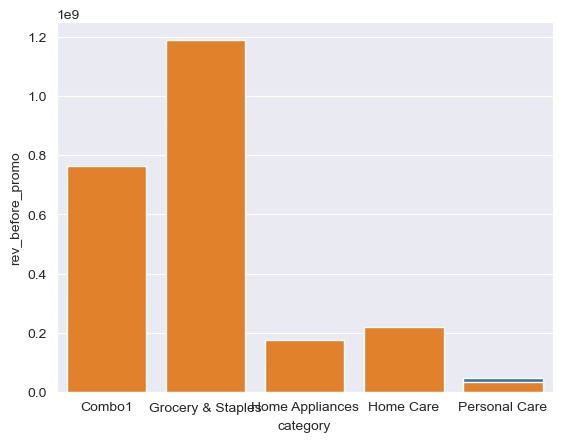

In [405]:
sns.barplot(df_bengaluru_category, x= 'category', y='rev_before_promo')
sns.barplot(df_bengaluru_category, x= 'category', y='rev_after_promo')

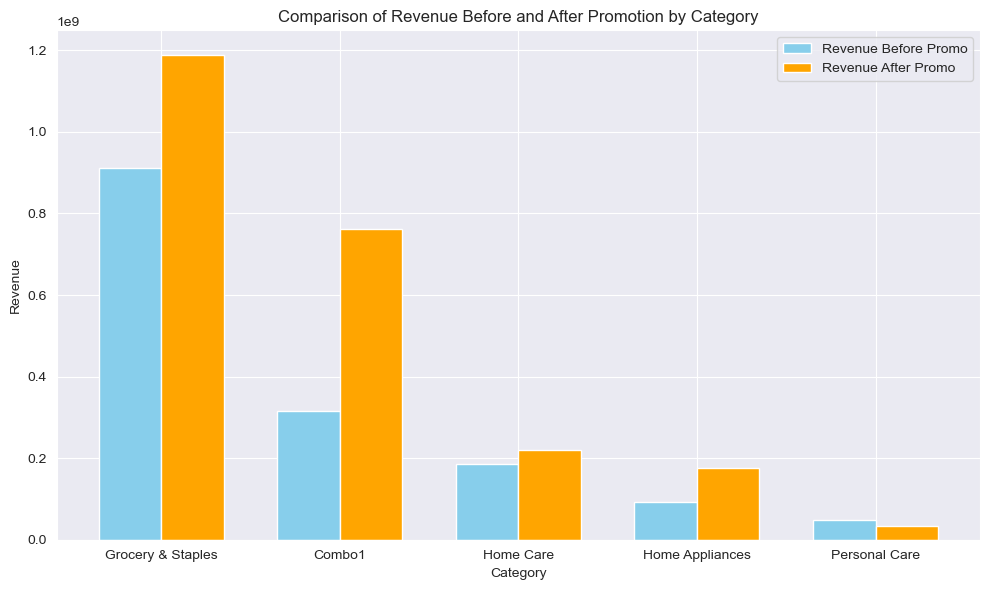

In [430]:
category_list = ['Combo1', 'Grocery & Staples', 'Home Appliances', 'Home Care',
       'Personal Care']


import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'category' column exists in the DataFrame
if 'category' in df_bengaluru_category.columns:
    # Filter the DataFrame to include only rows where category matches the category_list
    filtered_df = df_bengaluru_category[df_bengaluru_category['category'].isin(category_list)]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    width = 0.35  # Bar width

    # Bar positions
    x = range(len(filtered_df['category']))

    # Plot bars for before and after promo
    plt.bar(
        [pos - width/2 for pos in x], 
        filtered_df['rev_before_promo'], 
        width=width, 
        label='Revenue Before Promo', 
        color='skyblue'
    )
    plt.bar(
        [pos + width/2 for pos in x], 
        filtered_df['rev_after_promo'], 
        width=width, 
        label='Revenue After Promo', 
        color='orange'
    )

    # Add labels and title
    plt.xticks(ticks=x, labels=filtered_df['category'])
    plt.xlabel("Category")
    plt.ylabel("Revenue")
    plt.title("Comparison of Revenue Before and After Promotion by Category")
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("The column 'category' does not exist in your DataFrame. Please verify your data.")

